### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\July_2022\climate_df_July22.pkl")

In [3]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
58,1543021536898125828,[],rt @hunter_wesley: maya rudolph as dionne warwick still has the best argument against the global-warming-is-a-chinese-hoax conspiracy. #kim…,None,False,8phoenixrising,Fri Jul 01 23:59:37 +0000 2022
565,1543020617926148098,[],@edelmancanada we live in the most stable climate in the history of the earth. only a complete fool believes the government's climate propaganda.,EdelmanCanada,False,DeeLish2000,Fri Jul 01 23:55:57 +0000 2022
618,1543020510447017986,[],"those who rip apart the epa and destroy the environment aren't the ones saying they can't afford gas. we should be past the idea that consumer choices are the problem in the era of anti-climate propaganda, gutted education, rotting infrastructure, and hyperconsolidated wealth.",tradwifeguy,False,tradwifeguy,Fri Jul 01 23:55:32 +0000 2022
892,1543020056233349121,[],rt @hunter_wesley: maya rudolph as dionne warwick still has the best argument against the global-warming-is-a-chinese-hoax conspiracy. #kim…,None,False,JustThursday,Fri Jul 01 23:53:43 +0000 2022
1004,1543019879070142464,[],a news and social media platform designed to mitigate the climate of misinformation from @getetha\nhttps://t.co/el8rzmttki,None,False,itRadioShow,Fri Jul 01 23:53:01 +0000 2022
1246,1543019417713479680,[],"@dineshdsouza ok, so you are a conspiracy theorist who went to a good school. you make up stories for profit. regarding climate change, your stories attempt to convince some that cc is a joke. you know that is false and one can only hope your house floats away into the rising waters.",DineshDSouza,False,GeneMachine45,Fri Jul 01 23:51:11 +0000 2022
1268,1543019379939577856,[],"rt @foe_us: hey @facebook, how about curbing the tons of climate disinformation your platform is amplifying, so that the climate action you…",None,False,CarlosC52807143,Fri Jul 01 23:51:02 +0000 2022
1496,1543019034521640961,[],"@bstabell gop russian arab mafia plans:\n1.steal social security, medicare\n2.spread terrorist coups, mass shootings, global burning, climate disasters\n3.spread more lies &amp; propaganda\n4.kill democracy &amp; education to enslave &amp; price gouge\n5.keep stealing over $60 trillion from the bottom 91%",bstabell,False,bvnt123,Fri Jul 01 23:49:40 +0000 2022
1561,1543018920382083072,[],"gop russian arab mafia plans:\n1.steal social security, medicare\n2.spread terrorist coups, mass shootings, global burning, climate disasters\n3.spread more lies &amp; propaganda\n4.kill democracy &amp; education to enslave &amp; price gouge\n5.keep stealing over $60 trillion from the bottom 91%",None,False,bvnt123,Fri Jul 01 23:49:13 +0000 2022
1565,1543018907258191872,[],@philampatriot1 @livepddave1 i don't think you know what facts are. can you back up anything with credible sources?\n\nalso nobody admitted that the data is manipulated. that's just some crap conspiracy bloggers claim and is easy to debunk\n\nand the biggest mass extinction in history happened because of warming,PhilAmPatriot1,False,TyotoRiffle,Fri Jul 01 23:49:10 +0000 2022


In [5]:
df.is_retweet.value_counts()

False    636175
Name: is_retweet, dtype: int64

# Number of tweets

In [4]:
print(f"{len(df)} texts loaded.")

636175 texts loaded.


# Replies

In [5]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateCrisis': 5010,
         'propaganda': 4423,
         'ClimateEmergency': 4223,
         'climate': 3866,
         'ClimateChange': 3063,
         'ClimateBrawl': 2554,
         'ClimateScam': 2083,
         'misinformation': 2014,
         'ClimateAction': 1959,
         'climatechange': 1837,
         'COVID19': 1271,
         'ClimateBreakdown': 1104,
         'Vaccination': 1012,
         'CutTheCrapShow': 973,
         'Climate': 957,
         'democrats': 919,
         'ClimateCult': 886,
         'ClimateBarbie': 856,
         'johnkerry': 843,
         'privatejet': 843,
         'FossilFuel': 800,
         'disinformation': 741,
         'GlobalWarming': 736,
         'heatwave': 586,
         'UK': 555,
         'conspiracy': 546,
         'climatecrisis': 500,
         'globalwarminghoax': 417,
         'ExtinctionRebellion': 385,
         'WEF': 371,
         'DailyMail': 353,
         'Propaganda': 342,
         'climatemarch': 342,
         'climatehoax': 

         'meteorology': 15,
         'METoffice': 15,
         'Progressives': 15,
         'Boson': 15,
         'higgs': 15,
         'PAC': 15,
         'denier': 15,
         'Reality': 15,
         'Albo': 15,
         'Cloudburst': 15,
         'manipulatie': 15,
         'Sick': 15,
         'ClimateCrisispropaganda': 15,
         'DavidIcke': 15,
         'YouthActivist': 15,
         'Greens': 15,
         'Russiagate': 15,
         'InSearchOfTomorrow': 15,
         'ClimateCultElites': 15,
         'EcoFascistGlobalistGaslighters': 15,
         'KlausSchwab': 15,
         'mainstream': 15,
         'Odysee': 15,
         'economy': 15,
         'GasCrisis': 15,
         'progressives': 15,
         'Democrat': 15,
         'LiberalPaidMedia': 14,
         'PutinsWar': 14,
         'Pandemic': 14,
         'insurrection': 14,
         'followthemoney': 14,
         'ToryBeautyContest': 14,
         'alarmism': 14,
         'droughts': 14,
         'bancodeseries': 14,
       

In [6]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

ClimateAction
ClimateCult
climatechange
ClimateCrisis
globalwarminghoax
Climate
ClimateHysteria
ClimateBrawl
ClimateEmergency
climate
climatecrisis
ClimateChange
ClimateGate
ClimateGate2
ClimateGateEmails
GlobalWarmingIsASCAM
FlathEarth
Globalist
ClimateDaily
ClimateScam
globalwarming
wildearth
ClimateEngineering
climateactiondenier
Climatecult
ClimateBreakdown
healthscienceclimate
ClimateDenial
noclimatechange
ClimateActionNow
ClimateWars
climatehoax
ClimatePoop
GlobalWarming
climateliteracy
climateeducation
climatescience
ClimateSolutionsNowAct
ClimateFinMonday
Climatechange
climatechanges
CLIMATE
ClimateJustice
climatecommunism
ClimateTyranny
ClimateChangeHoax
Climatescam
globalalarmists
Globalists
climatescam
ClimateChangeIsNatural
climatelockdown
ClimateChangeIgnorance
CLIMATESCAM
ClimateChangeIsAHoax
ClimateCrisispropaganda
climatedenial
ClimateCultElites
EcoFascistGlobalistGaslighters
ClimateHoax
climatechangehoax
flatearth
climatechangeisreal
GlobalMelting
ClimateChangeAction
c

In [7]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [8]:
df.user_name.value_counts()

bvnt123            3713
TinTincognito      3295
Veritatem2021      1516
hassciencebot      1456
WakeDuhFuhCup1     1057
HearinYQF           939
WizePenguin         903
climate_fact        881
DickMackintosh      823
FakeTrumpBot1       816
GeraldKutney        804
tristamshanty       775
TyotoRiffle         709
Scarfer13           597
Unknown76148292     588
TraderStf           559
PeterSweden7        556
PaulJ996            545
ScienceNotDogma     537
TeXasMadde          527
Jeffrey75327765     501
ejwwest             491
lee19700904         479
DawnTJ90            475
GrnConservatism     472
CochiseJohn         418
PlanetEmergenc1     409
WeLnever            399
snafuabchao         394
Ceist8              369
JimBowersclimb      356
ROBERTMARGOLIN      354
RedPeriodismoMx     332
tan123              329
HmGinYYC            310
PeteDenes           309
MazeofDeception     300
CarolinaFaith2      291
casareilly          290
ClimateHubYYC       289
Hakimi09966557      278
PithyTruth      

# Searching in tweets

# Replies in climate

In [9]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

404981


231194

In [10]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [11]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

25708 Unique Tweets


# Bag of words: Climate change

In [3]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [4]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

KeyboardInterrupt: 

In [6]:
climate_split = [word for word in climate_split if not word in stop_words]

In [11]:
print(climate_split[0:10])

[':', 'maya', 'rudolph', 'dionne', 'warwick', 'still', 'best', 'argument', 'global-warming-is-a-chinese-hoax', 'conspiracy.']


In [10]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

KeyboardInterrupt: 

In [12]:
pprint(bow_climate.most_common(20))

[('climate', 558988),
 ('change', 244331),
 ('propaganda', 208090),
 ('misinformation', 119458),
 ('conspiracy', 111664),
 ('think', 92027),
 ('disinformation', 79855),
 ('fund', 69607),
 ('write', 67668),
 ('piece', 67323),
 ('global', 66897),
 ('hit', 66612),
 ('tank', 62653),
 ('get', 58497),
 ('people', 50398),
 ('lie', 49632),
 ('warming', 48703),
 ('want', 47974),
 ('make', 45692),
 ('news', 45450)]


# WordCloud

In [18]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_July_22.png")

# Count retweets

In [19]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

300801


# Ngrams: Climate

In [20]:
# print(processed_climate)

In [21]:
n = 3

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('write', 'hit', 'piece'), 53390),
 (('ban', 'climate', 'misinformation'), 36374),
 (('hit', 'piece', 'want'), 33045),
 (('hit', 'piece', 'try'), 31262),
 (('recently', 'write', 'hit'), 30614),
 (('think', 'tank', 'recently'), 30594),
 (('tank', 'recently', 'write'), 30594),
 (('climate', 'misinformation', 'guess'), 30499),
 (('misinformation', 'guess', 'fund'), 27476),
 (('fund', 'think', 'tank'), 23408)]

# Hashtag co-occurence


In [19]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [109]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#bitcoin', '#blockchain', '#crypto', '#eth', '#xrp'],
 ['#scotus', '#supremecourt'],
 ['#bitcoin', '#blockchain', '#crypto', '#eth', '#xrp'],
 ['#agenda2030',
  '#climatecrisis',
  '#conspiracy',
  '#courage',
  '#division',
  '#foodshortage',
  '#humanity',
  '#intelligence',
  '#lgbt',
  '#morals',
  '#nwo',
  '#plandemic'],
 ['#agenda2030',
  '#climatecrisis',
  '#conspiracy',
  '#courage',
  '#division',
  '#foodshortage',
  '#humanity',
  '#intelligente',
  '#lgbt',
  '#nwo',
  '#plandemic'],
 ['#chinesedependcy',
  '#climatechange',
  '#congo',
  '#electiccars',
  '#followthemoney',
  '#isitworthit',
  '#patrickbetdavid',
  '#valuetainment'],
 ['#climatecult', '#starvethepoor', '#worstpresidentever'],
 ['#epa', '#supremecourt', '#supremecourtdecision'],
 ['#blm',
  '#oilprices',
  '#politics',
  '#russia',
  '#soros',
  '#stockmarketcrash',
  '#stockmarkets',
  '#stocks',
  '#wayfair'],
 ['#climateaction',
  '#climatecrisis',
  '#endgbv',
  '#nsam2022',
  '#saam2022',
  '#saam

In [55]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#carbonemissions',
 '#massawakening',
 '#fertilizers',
 '#resistor',
 '#votingrights',
 '#law',
 '#notworking',
 '#bigbrother',
 '#heartland',
 '#torybeautycontest',
 '#inflation',
 '#cnn_news',
 '#overwatchporn',
 '#business',
 '#abctv',
 '#inuitobservations',
 '#nfl',
 '#cleanenergy',
 '#ccpvirus',
 '#lie',
 '#goodmorningbritain',
 '#climatehope',
 '#consumerism',
 '#cutthecrapshow',
 '#socialdistancing',
 '#rto',
 '#indigenousvoicetoparliament',
 '#childhealth',
 '#gas',
 '#clintons',
 '#clowns',
 '#pierscorbyn',
 '#glamorchina',
 '#wokeism',
 '#climateliteracy',
 '#johnsonout',
 '#yyccc',
 '#carbontaxes',
 '#doomsday',
 '#stopthetreaty',
 '#foxnewsjoe',
 '#americafirst',
 '#interview',
 '#demoralizing',
 '#meditation',
 '#curacao',
 '#disinformationwar',
 '#bioterrorist',
 '#irishfreedom',
 '#waleg',
 '#vanderwal',
 '#hottestdayoftheyear',
 '#saveour',
 '#floods',
 '#extintionrebellion',
 '#emissions',
 '#truthbrigade',
 '#canadians',
 '#stopwef',
 '#datascience',
 '#vancouver',


In [107]:
uni_htags_1 = ['#climatecrisis', '#climateemergency',
 '#covid19', '#misinformation',
 '#climate', '#climatecrisis',
 '#climate', '#climateemergency',
 '#covid19', '#vaccination',
 '#misinformation', '#vaccination',
 '#climatecrisis', '#fossilfuel',
 '#climatechange', '#climatecrisis',
 '#crisiidrica', '#vivi',
 '#climateemergency', '#democrats',
 '#climateemergency', '#johnkerry', 
 '#climateemergency', '#privatejet', 
 '#democrats', '#johnkerry',
 '#democrats', '#privatejet',
 '#johnkerry', '#privatejet',
 '#climatebrawl', '#climatecrisis',
 '#climateemergency', '#petersbergdialo',
 '#democrats', '#petersbergdialo',
 '#johnkerry', '#petersbergdialo',
 '#petersbergdialo', '#privatejet', 
 '#climatechange', '#cutthecrapshow',
 '#climatebrawl', '#climatecris',
 '#climatebrawl', '#climateemergency',
 '#bigoil', '#fossilfuel',
 '#bigoil', '#climatecrisis',
 '#climatechange', '#disinformation',
 '#climatechange', '#misinformation',
 '#cl', '#climatebreakdown',
 '#climatechange', '#propaganda',
 '#climateaction', '#climatecrisis',
 '#climate', '#propaganda',
 '#climatecrisis', '#disinformation',
 '#climatecrisis', '#misinformation',
 '#cutthecrapshow', '#wefpuppet',
 '#climatechange', '#vaccinatieschade',
 '#climatechange', '#wefpuppet',
 '#cutthecrapshow', '#vaccinatieschade',
 '#cutthecrapshow', '#schwabberteam66',
 '#climatecrisis', '#conspiracy',
 '#globalwarminghoax', '#propaganda',
 '#climatechange', '#schwabberteam66',
 '#climatechange', '#climateemergency',
 '#fuck', '#fuck',
 '#climateemergency', '#propaganda',
 '#climateemergency', '#extinctionrebellion', 
 '#climate', '#disinformation',
 '#vaccinatieschade', '#wefpuppet',
 '#climateemergency', '#masscivildiso',
 '#extinctionrebellion', '#masscivildiso', 
 '#dailymail', '#uk']
uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#petersbergdialo', '#masscivildiso', '#conspiracy', '#uk', '#climatebreakdown', '#johnkerry', '#climatecrisis', '#cl', '#bigoil', '#wefpuppet', '#climateaction', '#dailymail', '#covid19', '#vivi', '#misinformation', '#vaccinatieschade', '#fuck', '#crisiidrica', '#schwabberteam66', '#privatejet', '#cutthecrapshow', '#globalwarminghoax', '#disinformation', '#climatecris', '#climateemergency', '#fossilfuel', '#propaganda', '#climatechange', '#climate', '#vaccination', '#extinctionrebellion', '#climatebrawl', '#democrats']


In [108]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [84]:
# filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [95]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

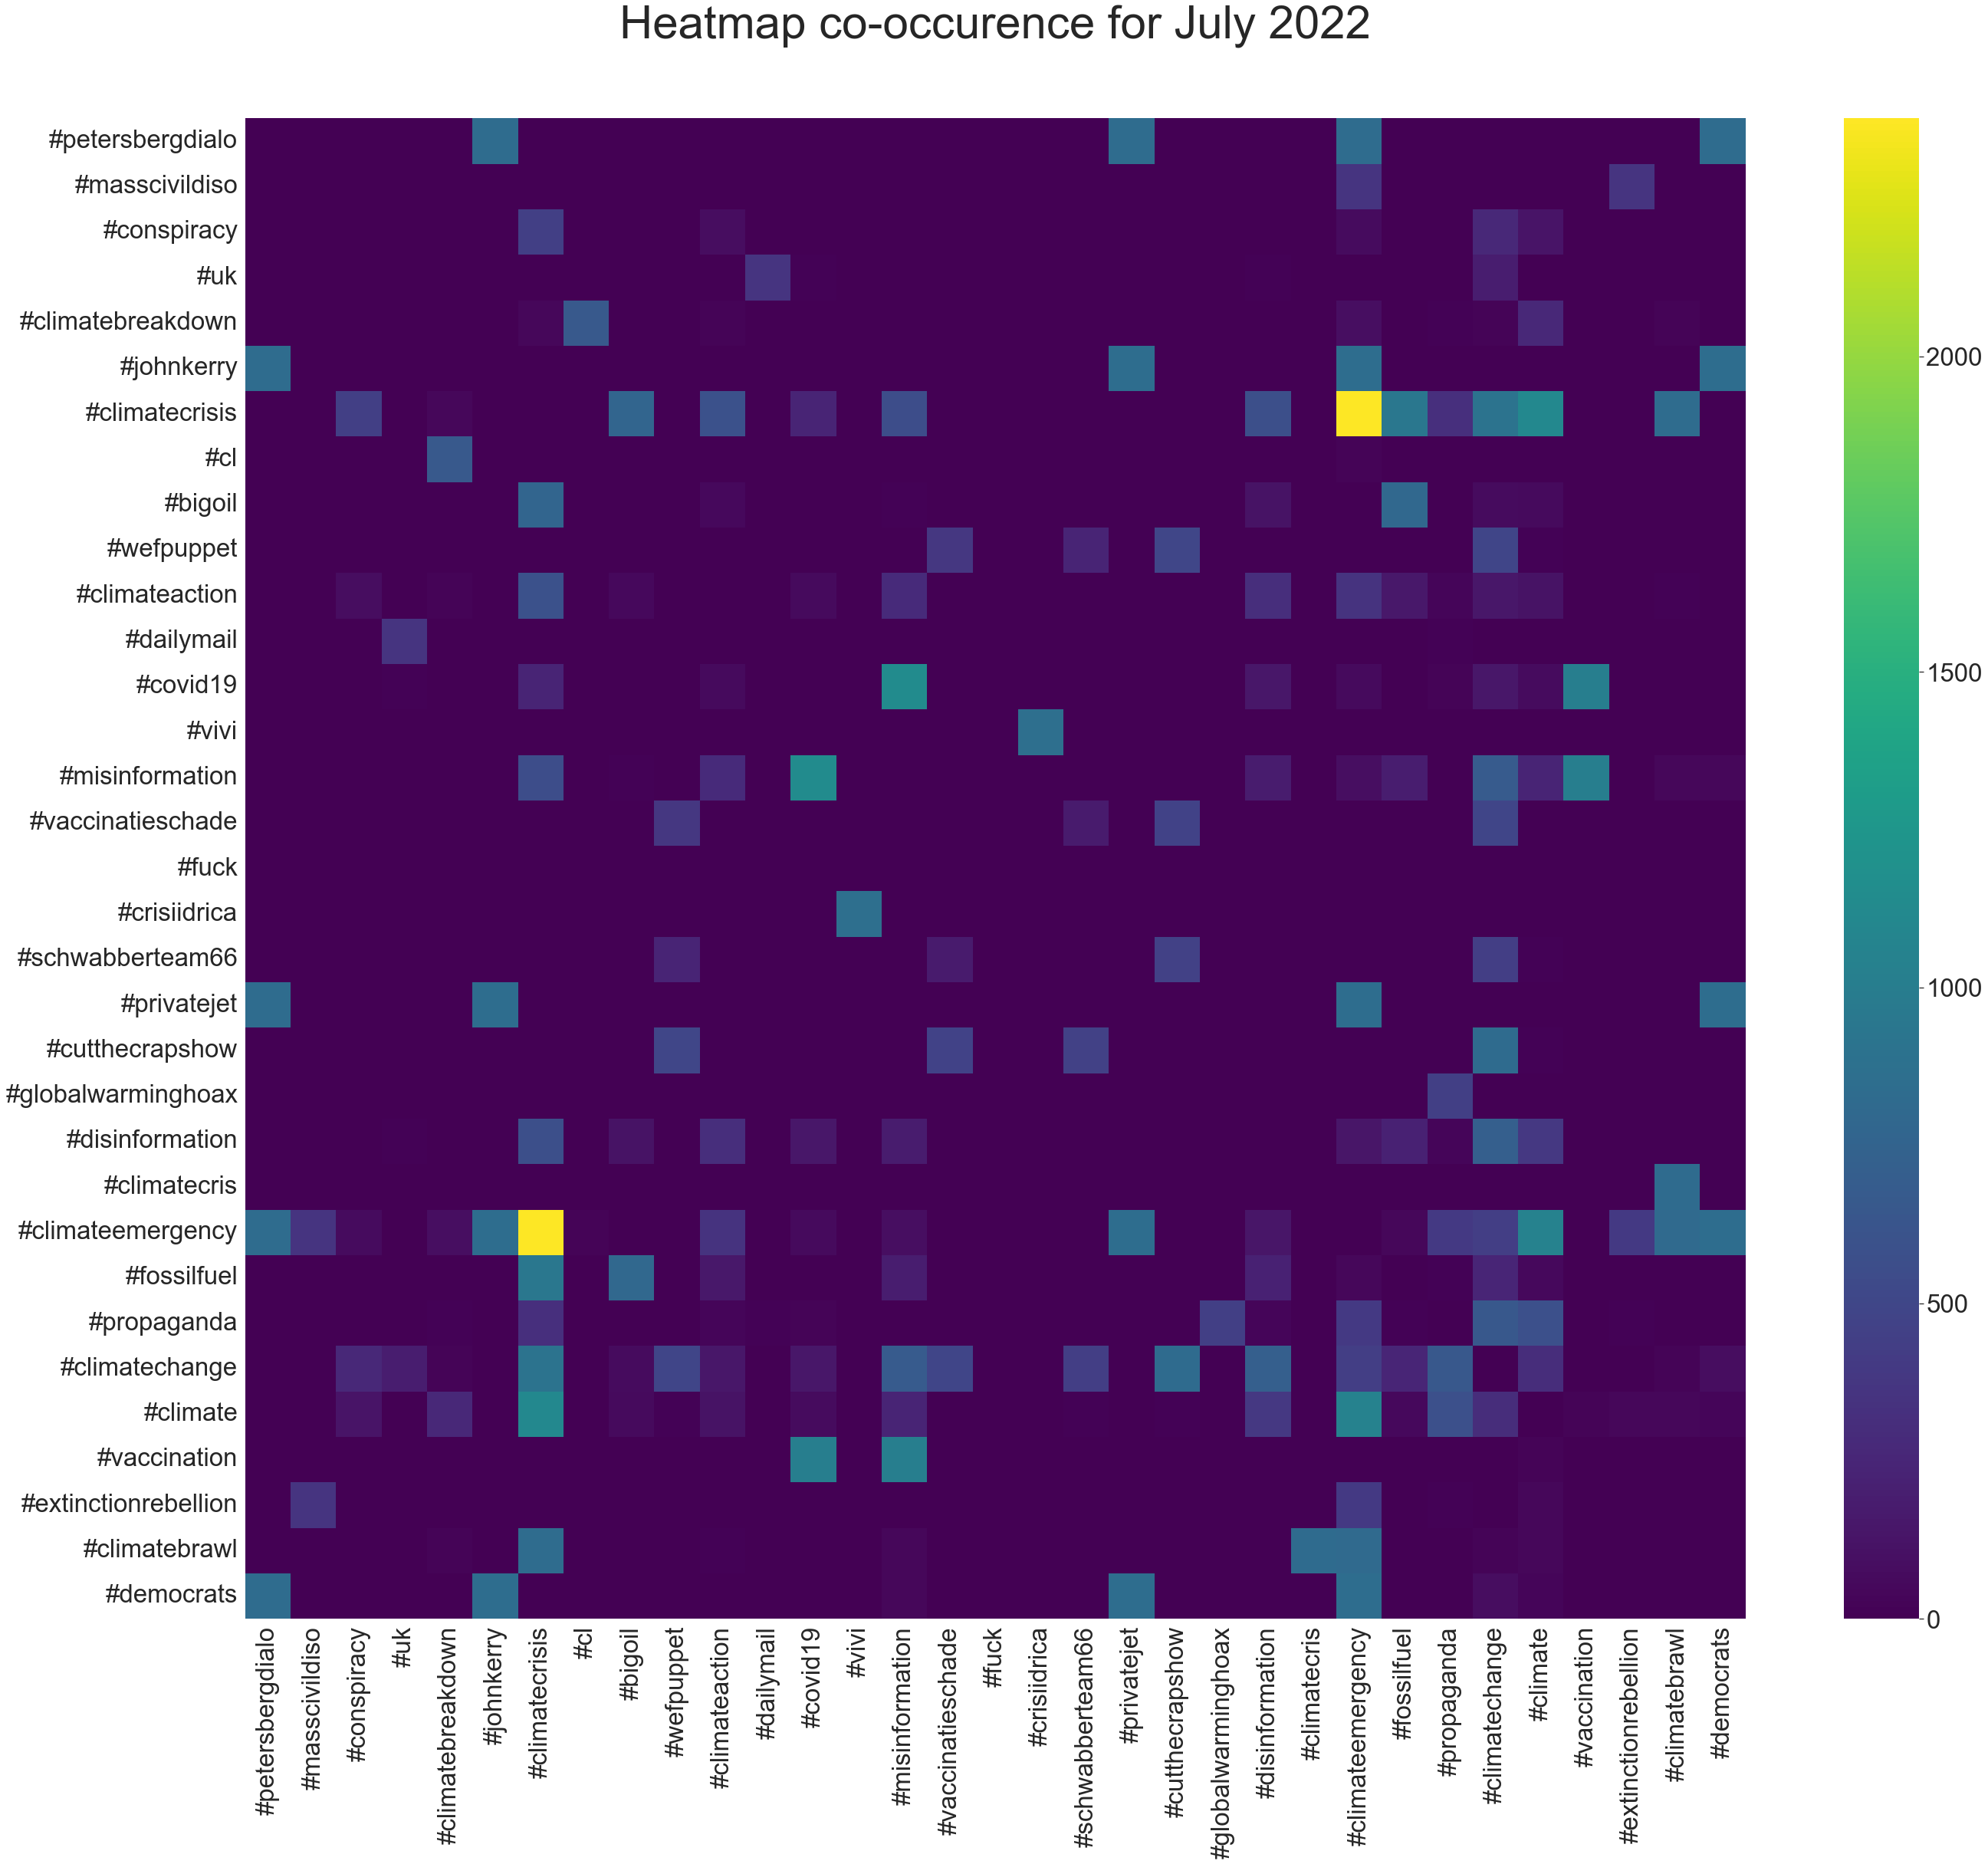

In [106]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for July 2022", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_July22.png")

In [21]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#climatecrisis', '#climateemergency'), 2377),
 (('#covid19', '#misinformation'), 1139),
 (('#climate', '#climatecrisis'), 1106),
 (('#climate', '#climateemergency'), 1049),
 (('#covid19', '#vaccination'), 1012),
 (('#misinformation', '#vaccination'), 1012),
 (('#climatecrisis', '#fossilfuel'), 942),
 (('#climatechange', '#climatecrisis'), 908),
 (('#crisiidrica', '#vivi'), 860),
 (('#climateemergency', '#democrats'), 843),
 (('#climateemergency', '#johnkerry'), 843),
 (('#climateemergency', '#privatejet'), 843),
 (('#democrats', '#johnkerry'), 843),
 (('#democrats', '#privatejet'), 843),
 (('#johnkerry', '#privatejet'), 843),
 (('#climatebrawl', '#climatecrisis'), 833),
 (('#climateemergency', '#petersbergdialo'), 830),
 (('#democrats', '#petersbergdialo'), 830),
 (('#johnkerry', '#petersbergdialo'), 830),
 (('#petersbergdialo', '#privatejet'), 830),
 (('#climatechange', '#cutthecrapshow'), 824),
 (('#climatebrawl', '#climatecris'), 819),
 (('#climatebrawl', '#climateemergency'), 8

# Most common hashtags

In [20]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(50)

[('#climatecrisis', 11074),
 ('#climatechange', 8718),
 ('#climateemergency', 7601),
 ('#climate', 6562),
 ('#propaganda', 6441),
 ('#climatebrawl', 3623),
 ('#climatescam', 3319),
 ('#misinformation', 2955),
 ('#climateaction', 2902),
 ('#kim', 2347),
 ('#disinformation', 1946),
 ('#globalwarming', 1625),
 ('#covid19', 1545),
 ('#fossilfuel', 1358),
 ('#climatecult', 1312),
 ('#climatebreakdown', 1293),
 ('#climates', 1281),
 ('#heatwave', 1173),
 ('#conspiracy', 1143),
 ('#cutthecrapshow', 1066),
 ('#vaccination', 1024),
 ('#auspol', 1019),
 ('#democrats', 976),
 ('#wef', 957),
 ('#bigoil', 949),
 ('#climatehoax', 943),
 ('#vivi', 860),
 ('#crisiidrica', 860),
 ('#climatebarbie', 856),
 ('#johnkerry', 843),
 ('#privatejet', 843),
 ('#petersbergdialo', 830),
 ('#climateactionnow', 821),
 ('#climatecris', 819),
 ('#agenda2030', 729),
 ('#demvoice', 701),
 ('#fakenews', 694),
 ('#cl', 673),
 ('#covid', 664),
 ('#uk', 664),
 ('#science', 647),
 ('#cdnpoli', 629),
 ('#corruptronjohnson', 

# Concordance

In [26]:
print(climate_strings[0:10000])

rt : maya rudolph as dionne warwick still has the best argument against the global-warming-is-a-chinese-hoax conspiracy. #kim…  we live in the most stable climate in the history of the earth. only a complete fool believes the government's climate propaganda. those who rip apart the epa and destroy the environment aren't the ones saying they can't afford gas. we should be past the idea that consumer choices are the problem in the era of anti-climate propaganda, gutted education, rotting infrastructure, and hyperconsolidated wealth. rt : maya rudolph as dionne warwick still has the best argument against the global-warming-is-a-chinese-hoax conspiracy. #kim… a news and social media platform designed to mitigate the climate of misinformation from 
https://t.co/el8rzmttki  ok, so you are a conspiracy theorist who went to a good school. you make up stories for profit. regarding climate change, your stories attempt to convince some that cc is a joke.  you know that is false and one can only h

In [27]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("climate", width=150, lines=50)

Displaying 50 of 409586 matches:
arming-is-a-chinese-hoax conspiracy. #kim…  we live in the most stable climate in the history of the earth. only a complete fool believes the governm
e history of the earth. only a complete fool believes the government's climate propaganda. those who rip apart the epa and destroy the environment ar
iracy. #kim… a news and social media platform designed to mitigate the climate of misinformation from 
https://t.co/el8rzmttki  ok, so you are a cons
t who went to a good school. you make up stories for profit. regarding climate change, your stories attempt to convince some that cc is a joke.  you 
 away into the rising waters. rt : hey , how about curbing the tons of climate disinformation your platform is amplifying, so that the climate action
ons of climate disinformation your platform is amplifying, so that the climate action you…  gop russian arab mafia plans:
1.steal social security, me
ty, medicare
2.spread terrorist coups, mass shootings, global burni

# Random tweets


In [ ]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

In [22]:
res=[]

for index, row in df.iterrows():
    if "blah" in row.tweet_text.lower():
        res.append(row.tweet_text)
        
res[0:500]

['currently doing a cert iii in supply and logistics (i chose it for its ironic appeal) and its doing my head in. \nthe focus on climate change blah blah is not subtle and apart from reinforcing common sense practice that most of us get in the work place, its just propaganda.',
 'currently doing a cert iii in supply and logistics (i chose it for its ironic appeal) and its doing my head in. \nthe focus on climate change blah blah is not subtle and apart from reinforcing common sense practice that most of us get in the work place, its just propaganda.',
 'currently doing a cert iii in supply and logistics (i chose it for its ironic appeal) and its doing my head in. \nthe focus on climate change blah blah is not subtle and apart from reinforcing common sense practice that most of us get in the work place, its just propaganda.',
 '@ninishninja @antilibmob @antidogmattic @jamesca45920153 @marcysillver1 @danhunt48247394 @gama_ultra @mtstringer1 @rushvillerockit @realdeltadawn @tomdoubting @b

# TF-IDF Scores

In [46]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [47]:
len(no_retweets)

104180

In [13]:
# climate_list = []
# for tweet in tweets:
#     climate_list.append(tweet)

# climate_list[1]

"@edelmancanada we live in the most stable climate in the history of the earth. only a complete fool believes the government's climate propaganda."

In [48]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [25]:
tfidf_data[0:10]

['edelmancanada we live in the most stable climate in the history of the earth only a complete fool believe the government s climate propaganda',
 'those who rip apart the epa and destroy the environment aren t the one say they can t afford gas we should be past the idea that consumer choice be the problem in the era of anti climate propaganda gutted education rot infrastructure and hyperconsolidated wealth',
 'a news and social medium platform design to mitigate the climate of misinformation from getetha http t co el8rzmttki',
 'dineshdsouza ok so you be a conspiracy theorist who go to a good school you make up story for profit regard climate change your story attempt to convince some that cc be a joke you know that be false and one can only hope your house float away into the rise water',
 'bstabell gop russian arab mafia plan 1 steal social security medicare 2 spread terrorist coup mass shoot global burn climate disaster 3 spread more lie amp propaganda 4 kill democracy amp educatio

In [41]:
tfidf_data = " ".join(tfidf_data)
# tfidf_data = [word for word in tfidf_data if not word in stop_words]

In [45]:

tfidf_data[0:10]

['edelmancanada',
 'we',
 'live',
 'in',
 'the',
 'most',
 'stable',
 'climate',
 'in',
 'the']

In [49]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(),index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [50]:
print(df_tfidfvect.head())

    00  000  0000025  0001c  000yrs  001  002  003  00am   01  015  \
0  0.0  0.0      0.0    0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0   
1  0.0  0.0      0.0    0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0   
2  0.0  0.0      0.0    0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0   
3  0.0  0.0      0.0    0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0   
4  0.0  0.0      0.0    0.0     0.0  0.0  0.0  0.0   0.0  0.0  0.0   

   015qacojsn  01jsaspaf4  01jtjhrd8d   02  022dc2ztdp  02is2yz3sp  \
0         0.0         0.0         0.0  0.0         0.0         0.0   
1         0.0         0.0         0.0  0.0         0.0         0.0   
2         0.0         0.0         0.0  0.0         0.0         0.0   
3         0.0         0.0         0.0  0.0         0.0         0.0   
4         0.0         0.0         0.0  0.0         0.0         0.0   

   02z7udoiwu  0364njnfra  03pzu012yk   04  04mfsfhm2k   05  05t4qq0scz   06  \
0         0.0         0.0         0.0  0.0         0.0  0.0         0.0  0.0  

In [51]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.7].sort_values(ascending=False)

In [52]:
tokens_above_threshold

blah                                                         0.977032
eveywhere                                                    0.970219
djaie0wnsq                                                   0.965827
drip                                                         0.962022
insert                                                       0.961816
dwuewk1usb                                                   0.960482
overwhelm                                                    0.957587
alright                                                      0.956155
hoax                                                         0.955242
8tqpjdq19d                                                   0.952943
climatehoax                                                  0.952316
dih9tnsinw                                                   0.950000
2ly9f1f5fo                                                   0.950000
pathetic                                                     0.949297
pg8zi9x2yg          